In [12]:
# importing the libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [13]:
# input and labels
# four possible input pairs of (x1,x2). 
x_input = np.array([[0,0],[0,1],[1,0],[1,1]])

# t_and   = np.array([0,0,0,1]) # and
# t_or    = np.array([0,1,1,1]) # or
# t_nand  = np.array([1,1,1,0]) # nand
# t_nor   = np.array([1,0,0,0]) # nor
# t_xor   = np.array([0,1,1,0]) # xor


t_label = np.array([0,1,1,0])

In [14]:
# define the activation function and its derivative (sigmoid)


def sigmoid(x):
    """ This is the sigmoid function."""
    return 1 / (1+np.exp(-x))



def sigmoidprime(x):
    """ 
    sigmoind funciton derivative.
    using the user defiend sigmoind function above.
    """
    s = sigmoid(x)
    return s*(1-s)


In [15]:
class Perceptron:
    
    def __init__(self, input_units):
        self.input_units = input_units
        
        self.weights = np.random.randn(input_units)
        self.bias = np.random.randn()
        self.alpha = 1
        
        
        self.inputs = 0
        self.drive = 0
        
    def forward_step(self, inputs):
        self.inputs = inputs
        
        self.drive = self.weights @ inputs + self.bias
        
        return sigmoid(self.drive)
        
        
    def update(self, delta): # ?
        # Compute the gradients for weights and bias.
        gradient_weights = delta * self.inputs
        gradient_bias = delta
        # Update weights and bias.
        self.weights -=  self.alpha * gradient_weights
        self.bias -= self.alpha * gradient_bias
        

In [16]:
# multi-layer perceptron 
class MLP:
    
    def __init__(self):
        # the hidden layer perceptron
        self.hidden_layer = [
            Perceptron(input_units=2),
            Perceptron(input_units=2),
            Perceptron(input_units=2),
            Perceptron(input_units=2)
        ]
        # output neuron.
        self.output_neuron = Perceptron(input_units=4)
        # Initializing a variable to store the output.
        self.output = 0
        
    def forward_step(self, inputs):
        # Compute the activations for the hidden layer.
        activations_hidden = np.array([p.forward_step(inputs) for p in self.hidden_layer])
        # You might need to reshape ((4,1)->(4,)) the resulting array to feed it to the output neuron. 
        # Check 'np.reshape(arr, newshape=(-1)).'
        activations_hidden = np.reshape(activations_hidden, newshape=(-1))
        # Compute the activation of the output neuron and store it in 'self.output'.
        self.output = self.output_neuron.forward_step(activations_hidden)
        ######################
        
    def backprop_step(self, inputs, target):
        # the loss function Sum-squared error
        # delta at the output neuron.
        output_delta = - (target - self.output) * sigmoidprime(self.output_neuron.drive)
        # Update the parameters of  the output neuron.
        self.output_neuron.update(output_delta)
        # deltas for the hidden neurons.
        hidden_deltas = [output_delta * sigmoidprime(p.drive) * self.output_neuron.weights[i] for i, p in enumerate(self.hidden_layer)]
        # Update the parameters for all four neurons in the hidden layer.
        for i,p in enumerate(self.hidden_layer):
            p.update(hidden_deltas[i])
        

In [17]:
# Initialize the MLP.
mlp = MLP()
# Initialize lists to store epochs, loss, accuracy.
epochs=[]
losses=[]
accuracies=[]

for epoch in range(1000):
    epochs.append(epoch)
    
    accuracy_buffer = 0
    loss_buffer = 0
    
    # Training loop.
    for i in range(4):
        x = x_input[i]
        t = t_label[i]
        
        
        # forward step 
        mlp.forward_step(x)
        # backpropagation step 
        mlp.backprop_step(x,t)
        
        
        accuracy_buffer += int(float(mlp.output>=0.5) == t)
        loss_buffer += (t-mlp.output)**2
        
    accuracies.append(accuracy_buffer/4.0)
    losses.append(loss_buffer)

<IPython.core.display.Javascript object>


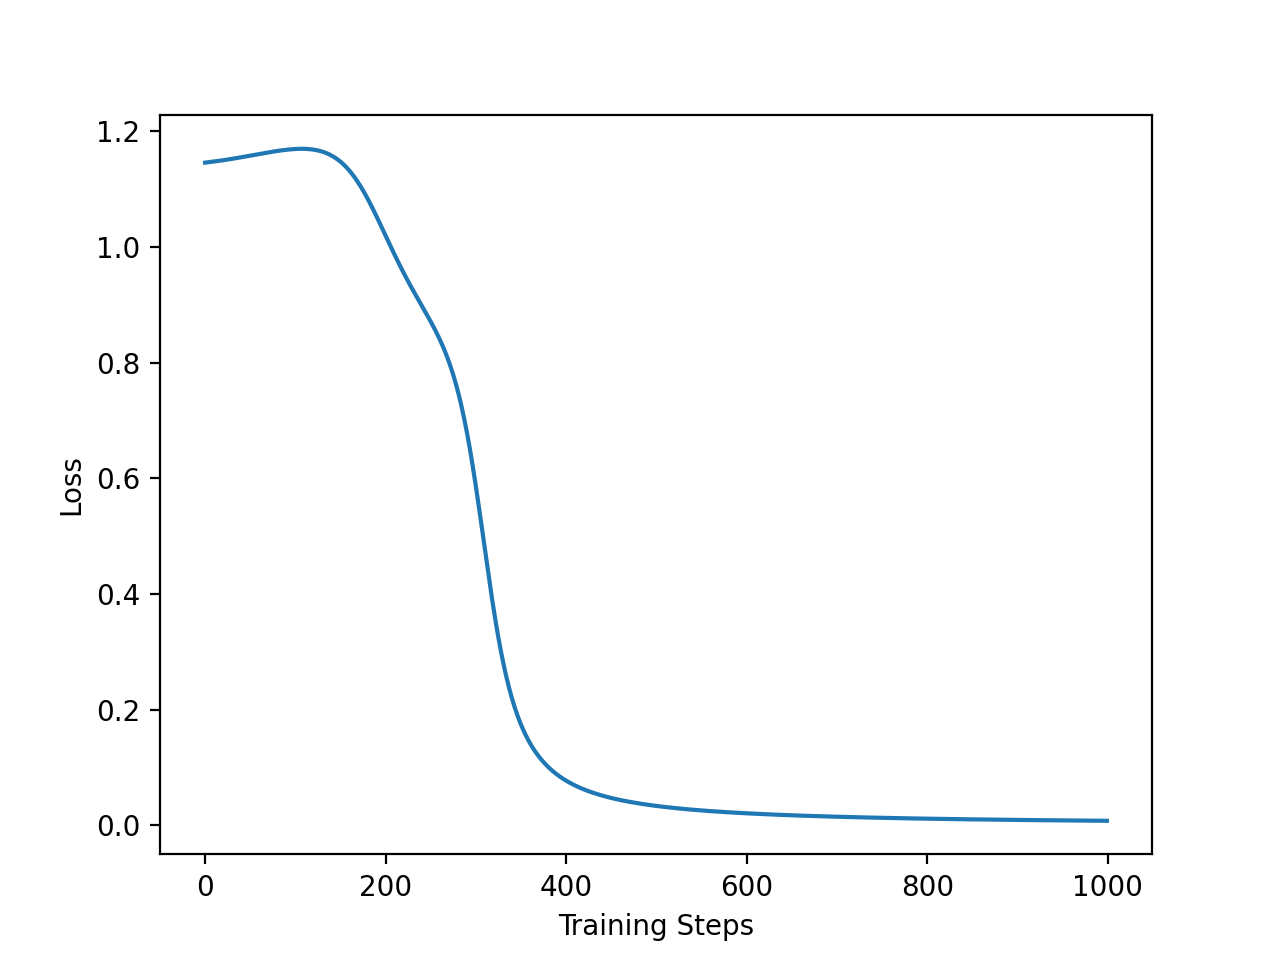

<IPython.core.display.Javascript object>


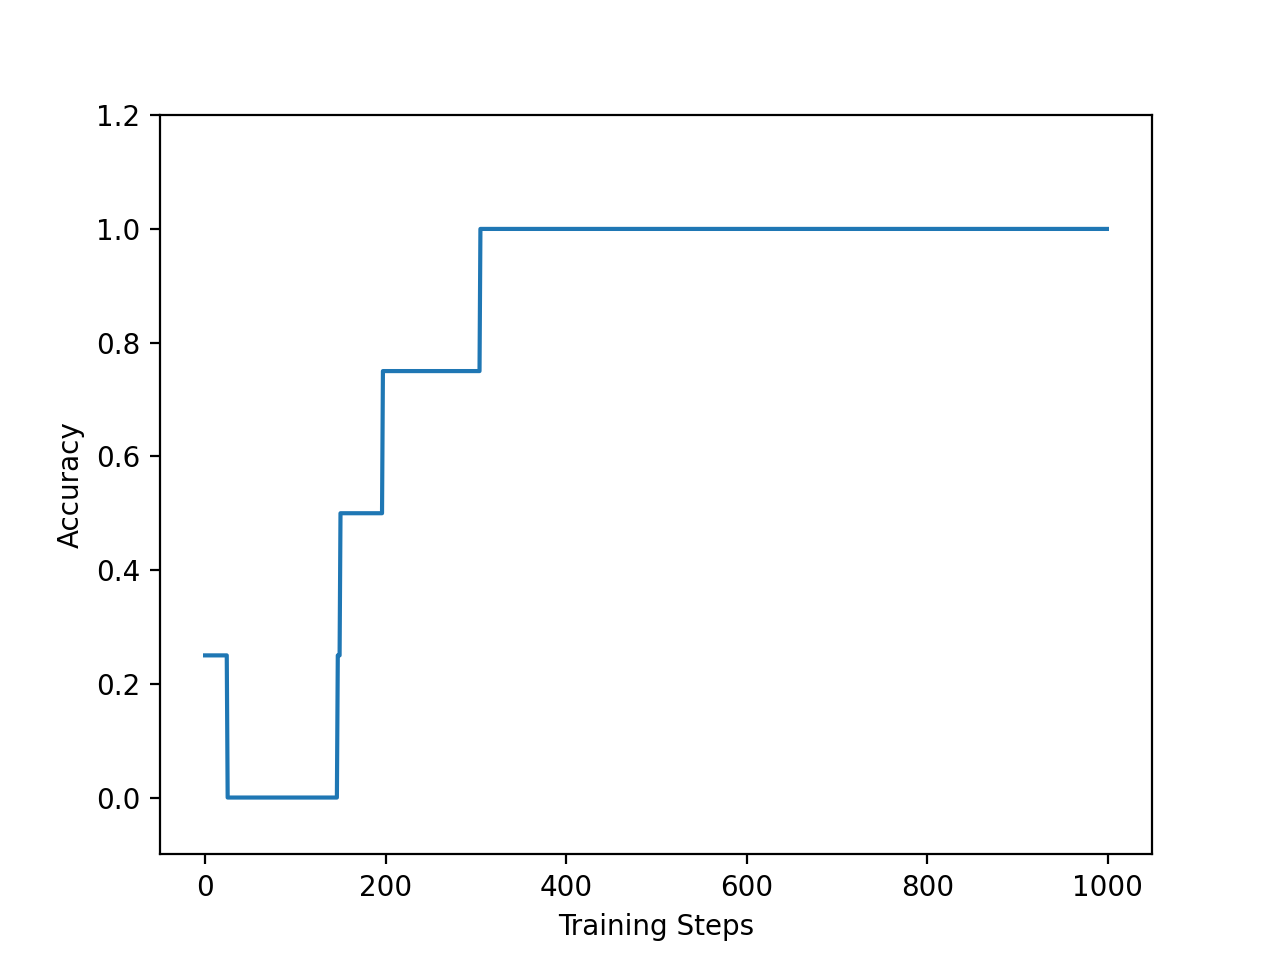

In [18]:
# Visualization 
plt.figure()
plt.plot(epochs,losses)
plt.xlabel("Training Steps")
plt.ylabel("Loss")
plt.show()


plt.figure()
plt.plot(epochs,accuracies)
plt.xlabel("Training Steps")
plt.ylabel("Accuracy")
plt.ylim([-0.1, 1.2])
plt.show()